# Comparison of Classifiers for Student Performance Prediction

## The dataset


### What is the purpose of the dataset?
This dataset is for creating classification models that will predict the students dropout and their academic success.

### What are the features


Each instance in the dataset represents a student.

### What is the target?

The target is


## Analyzing the dataset

In [1]:
import pandas as pd
import numpy as np

from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTENC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV



In [2]:
dataset = pd.read_csv('dataset_student_performance.csv',sep=";")
dataset.info()
#dataframe = pd.DataFrame(dataset)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [4]:
#dataset.head()

## "Data washing"

By looking at the contents of the dataset. We observe that the features are already encoded into integers.
So what we will need to do is 
- Split the features into categorical and numerical features.

After that is done, we will need to 
- Encode the categorical ones differently so they are not integers, we can achieve this by using one hot encoding.

### Splitting the features into categorical and numerical features

By using the dataset.info(), we can see what features are numerical and integer(categorical).
We need to be cautious to not assume all the integers are categorical. For instance, age, is not a catagorical feature even though it's an integer.

The numerical:

- 6,   Previous qualification (grade)                  , float64
- 12,  Admission grade                                 , float64
- 25,  Curricular units 1st sem (grade)                , float64
- 31,  Curricular units 2nd sem (grade)                , float64
- 33,  Unemployment rate                               , float64
- 34,  Inflation rate                                  , float64
- 35,  GDP                                             , float64

The target: 
- 36  Target,  object, which is three categories, encoded as ints. (dropout, enrolled, and graduate)

By inspecting the documentation further, we can now make an overview over what integers are categorical, and which are not.

The categorical:

- 0,   Marital status, int64  
- 1,   Application mode, int64  
- 2,   Application order, int64  
- 3,   Course, int64  
- 4,   Daytime/evening attendance, int64  
- 5,   Previous qualification, int64  
- 7,   Nacionality, int64  
- 8,   Mother's qualification, int64  
- 9,   Father's qualification, int64  
- 10,  Mother's occupation, int64  
- 11,  Father's occupation, int64  
- 13,  Displaced, int64  
- 14,  Educational special needs, int64  
- 15,  Debtor, int64  
- 16,  Tuition fees up to date, int64  
- 17,  Gender, int64  
- 18,  Scholarship holder, int64 
- 20,  International, int64 

The non categorical: 

- 19, Age at enrollment, int64
- 21, Curricular units 1st sem (credited),  int64  
- 22, Curricular units 1st sem (enrolled),  int64  
- 23, Curricular units 1st sem (evaluations),  int64  
- 24, Curricular units 1st sem (approved),  int64  
- 26, Curricular units 1st sem (without evaluations),  int64  
- 27, Curricular units 2nd sem (credited),  int64  
- 28, Curricular units 2nd sem (enrolled),  int64  
- 29, Curricular units 2nd sem (evaluations),  int64  
- 30, Curricular units 2nd sem (approved),  int64  
- 32  Curricular units 2nd sem (without evaluations), int64  


So, now we can combine them and perphaps group them into the following:


The categorical:

- 0,   Marital status, int64  
- 1,   Application mode, int64  
- 2,   Application order, int64  
- 3,   Course, int64  
- 4,   Daytime/evening attendance, int64  
- 5,   Previous qualification, int64  
- 7,   Nacionality, int64  
- 8,   Mother's qualification, int64  
- 9,   Father's qualification, int64  
- 10,  Mother's occupation, int64  
- 11,  Father's occupation, int64  
- 13,  Displaced, int64  
- 14,  Educational special needs, int64  
- 15,  Debtor, int64  
- 16,  Tuition fees up to date, int64  
- 17,  Gender, int64  
- 18,  Scholarship holder, int64 
- 20,  International, int64 

The numerical:

- 6,  Previous qualification (grade), float64
- 12, Admission grade, float64
- 25, Curricular units 1st sem (grade), float64
- 31, Curricular units 2nd sem (grade), float64
- 33, Unemployment rate, float64
- 34, Inflation rate, float64
- 35, GDP, float64
- 19, Age at enrollment, int64
- 21, Curricular units 1st sem (credited),  int64  
- 22, Curricular units 1st sem (enrolled),  int64  
- 23, Curricular units 1st sem (evaluations),  int64  
- 24, Curricular units 1st sem (approved),  int64  
- 26, Curricular units 1st sem (without evaluations),  int64  
- 27, Curricular units 2nd sem (credited),  int64  
- 28, Curricular units 2nd sem (enrolled),  int64  
- 29, Curricular units 2nd sem (evaluations),  int64  
- 30, Curricular units 2nd sem (approved),  int64  
- 32, Curricular units 2nd sem (without evaluations), int64  

The target(categorical): 
- 36  Target,  object

In [5]:
#print(dataset.columns.tolist())
#Here we can double check that the syntax of the lists are correct according to the index.
#'Daytime/evening attendance\t' will give an index error if the \t is not included.

In [3]:
categorical_features = [
    "Marital status", "Application mode", "Application order", "Course", 
    "Daytime/evening attendance\t", "Previous qualification", "Nacionality", 
    "Mother's qualification", "Father's qualification", "Mother's occupation", 
    "Father's occupation", "Displaced", "Educational special needs", "Debtor", 
    "Tuition fees up to date", "Gender", "Scholarship holder", "International"
]

numerical_features = [
    "Previous qualification (grade)", "Admission grade", "Curricular units 1st sem (grade)", 
    "Curricular units 2nd sem (grade)", "Unemployment rate", "Inflation rate", "GDP", 
    "Age at enrollment", "Curricular units 1st sem (credited)", "Curricular units 1st sem (enrolled)", 
    "Curricular units 1st sem (evaluations)", "Curricular units 1st sem (approved)", 
    "Curricular units 1st sem (without evaluations)", "Curricular units 2nd sem (credited)", 
    "Curricular units 2nd sem (enrolled)", "Curricular units 2nd sem (evaluations)", 
    "Curricular units 2nd sem (approved)", "Curricular units 2nd sem (without evaluations)"
]

target = "Target"
dataset_categorical = dataset[categorical_features]
dataset_numerical = dataset[numerical_features]
dataset_target = dataset[target]

<Axes: >

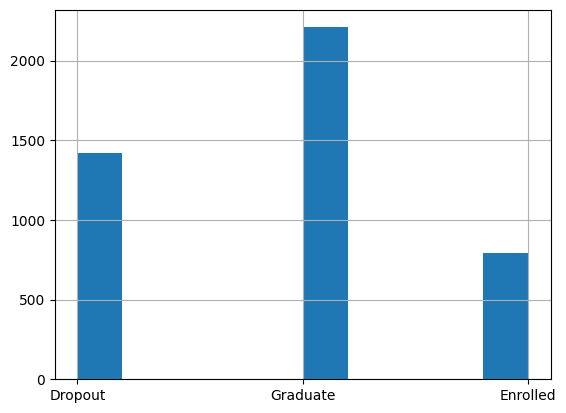

In [4]:
dataset_target.hist()

We need to balance the classes, because we can see that the model will train on more graduate since there is more data in that output?

In [8]:
#dataset_oversampled,_ = SMOTENC('auto').fit_resample(categorical_features, dataset['Target'])
#dataset_oversampled_dataframe = pd.concat


## Making Onehot encoding of the categorical features


In [5]:
from sklearn.preprocessing import LabelEncoder

dataset_categorical_onehot = pd.get_dummies(dataset_categorical)
#dataset_target_onehot = pd.get_dummies(dataset_target)

label_encoder = LabelEncoder()


dataset['Target'] = pd.DataFrame(label_encoder.fit_transform(dataset_target))
#target_encoded.info()

In [6]:
combined_dataset = pd.concat([dataset_numerical, dataset['Target'], dataset_categorical_onehot], axis=1)
combined_dataset.head()

,Previous qualification (grade),Admission grade,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),...,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International
0,122.0,127.3,0.000000,0.000000,10.8,1.4,1.74,20,0,0,...,12,5,9,1,0,0,1,1,0,0
1,160.0,142.5,14.000000,13.666667,13.9,-0.3,0.79,19,0,6,...,3,3,3,1,0,0,0,1,0,0
2,122.0,124.8,0.000000,0.000000,10.8,1.4,1.74,19,0,6,...,37,9,9,1,0,0,0,1,0,0
3,122.0,119.6,13.428571,12.400000,9.4,-0.8,-3.12,20,0,6,...,37,5,3,1,0,0,1,0,0,0
4,100.0,141.5,12.333333,13.000000,13.9,-0.3,0.79,45,0,6,...,38,9,9,0,0,0,1,0,0,0


## Now lets combine them together again


In [7]:
combined_dataset = pd.concat([dataset_numerical, dataset['Target'], dataset_categorical_onehot], axis=1)
combined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Previous qualification (grade)                  4424 non-null   float64
 1   Admission grade                                 4424 non-null   float64
 2   Curricular units 1st sem (grade)                4424 non-null   float64
 3   Curricular units 2nd sem (grade)                4424 non-null   float64
 4   Unemployment rate                               4424 non-null   float64
 5   Inflation rate                                  4424 non-null   float64
 6   GDP                                             4424 non-null   float64
 7   Age at enrollment                               4424 non-null   int64  
 8   Curricular units 1st sem (credited)             4424 non-null   int64  
 9   Curricular units 1st sem (enrolled)      

## Creating our split

In [8]:
train_val = combined_dataset.groupby(dataset['Target'], group_keys=False)[combined_dataset.columns].apply(lambda x: x.sample(frac=0.8))
test_set = combined_dataset.drop(train_val.index)

In [9]:
features = combined_dataset.drop('Target', axis=1)
targets = combined_dataset['Target']

train_val_features = train_val.drop('Target', axis=1)
train_val_targets = train_val['Target']

test_features = test_set.drop('Target', axis=1)
test_targets = test_set['Target']

## Pre-proccessing 

Lets proceed with the dataset now, and see what kind of results it produces. After that we can take pre processing steps to see how it changes the result.
But here we can expand by trying out normalization, PCA, etc.

## Splitting

### Why this split percentage
### Why this sampling technique

## Creating the models


### Evaluation function


In [13]:
'''
def evaluate(model):
    train_probabilities = model.predict_proba(train_val_features)
    train_predictions = model.classes_.take(np.argmax(train_probabilities, axis=1), axis=0)

    print(f'Training Accuracy: {accuracy_score(train_val_targets, train_predictions)}')
    print(f'Training Precision: {precision_score(train_val_targets, train_predictions, average="weighted")}')
    print(f'Training Recall: {recall_score(train_val_targets, train_predictions, average="weighted")}')
    print(f'Training F1: {f1_score(train_val_targets, train_predictions, average="weighted")}')
    print(f'Training ROC AUC: {roc_auc_score(train_val_targets, train_probabilities, average="macro", multi_class="ovr")}')

    test_probabilities = model.predict_proba(test_features)
    test_predictions = model.classes_.take(np.argmax(test_probabilities, axis=1), axis=0)

    print(f'Test Accuracy: {accuracy_score(test_targets, test_predictions)}')
    print(f'Test Precision: {precision_score(test_targets, test_predictions, average="weighted")}')
    print(f'Test Recall: {recall_score(test_targets, test_predictions, average="weighted")}')
    print(f'Test F1: {f1_score(test_targets, test_predictions, average="weighted")}')
    print(f'Test ROC AUC: {roc_auc_score(test_targets, test_probabilities, average="macro", multi_class="ovr")}')
    print()
'''
#

'\ndef evaluate(model):\n    train_probabilities = model.predict_proba(train_val_features)\n    train_predictions = model.classes_.take(np.argmax(train_probabilities, axis=1), axis=0)\n\n    print(f\'Training Accuracy: {accuracy_score(train_val_targets, train_predictions)}\')\n    print(f\'Training Precision: {precision_score(train_val_targets, train_predictions, average="weighted")}\')\n    print(f\'Training Recall: {recall_score(train_val_targets, train_predictions, average="weighted")}\')\n    print(f\'Training F1: {f1_score(train_val_targets, train_predictions, average="weighted")}\')\n    print(f\'Training ROC AUC: {roc_auc_score(train_val_targets, train_probabilities, average="macro", multi_class="ovr")}\')\n\n    test_probabilities = model.predict_proba(test_features)\n    test_predictions = model.classes_.take(np.argmax(test_probabilities, axis=1), axis=0)\n\n    print(f\'Test Accuracy: {accuracy_score(test_targets, test_predictions)}\')\n    print(f\'Test Precision: {precision

In [83]:
def evaluate(model):
    train_probabilities = model.predict_proba(train_val_features)
    train_predictions = model.classes_.take(np.argmax(train_probabilities, axis=1), axis=0)

    print(f'Training Accuracy: {accuracy_score(train_val_targets, train_predictions)}')
    print(f'Training Precision: {precision_score(train_val_targets, train_predictions, average="micro")}')
    print(f'Training Recall: {recall_score(train_val_targets, train_predictions, average="micro")}')
    print(f'Training F1: {f1_score(train_val_targets, train_predictions, average="micro")}')
    print(f'Training ROC AUC: {roc_auc_score(train_val_targets, train_probabilities, average="micro", multi_class="ovr")}')

    test_probabilities = model.predict_proba(test_features)
    test_predictions = model.classes_.take(np.argmax(test_probabilities, axis=1), axis=0)

    print(f'Test Accuracy: {accuracy_score(test_targets, test_predictions)}')
    print(f'Test Precision: {precision_score(test_targets, test_predictions, average="micro")}')
    print(f'Test Recall: {recall_score(test_targets, test_predictions, average="micro")}')
    print(f'Test F1: {f1_score(test_targets, test_predictions, average="micro")}')
    print(f'Test ROC AUC: {roc_auc_score(test_targets, test_probabilities, average="micro", multi_class="ovr")}')
    print()


## Tuning the hyperparameters

### Grid search

In [14]:
metrics = ['accuracy', 'precision_micro', 'recall_micro', 'f1_micro', 'roc_auc_ovr']


## Creating a function for GridSearch

### and creating param grid dictionaries

In [14]:
param_grid_RF = {
        'max_depth': np.arange(1, 15, 5),
        'n_estimators': np.arange(5, 100, 10),
        'max_features': np.arange(0.1, 1.0, 0.05),
        }


param_grid_GB = {
    'n_estimators': np.arange(50, 201, 50),
    'learning_rate': np.arange(0.01, 0.25, 0.05),
    'max_depth': np.arange(3, 11, 2)
    }


param_grid_ADA = {
    'n_estimators': np.arange(50, 201, 50),
    'learning_rate': np.arange(0.01, 1.1, 0.3),
    'estimator__max_depth': np.arange(1, 6, 2)
    }


param_grid_NB = {
    'var_smoothing': np.logspace(-9, -6, 4)  # 1e-9, 1e-8, 1e-7, 1e-6 ?
    }


In [15]:
def train_grid_search(classifier, parameter_grid, scoring,refit, features, target, cv=5, verbose=1):
    grid_search = GridSearchCV(
        estimator=classifier,
        param_grid=parameter_grid,
        scoring=scoring,
        refit=refit,
        cv=cv,
        verbose=verbose,
        n_jobs=-1
    )

    grid_search.fit(features, target)
    results = pd.DataFrame(grid_search.cv_results_)
    best_model = grid_search.best_estimator_

    print(f"best parameters: {grid_search.best_params_}")
    print(f"best score: {grid_search.best_score_:.4f}")

    return best_model, results

In [87]:
train_grid_search(RandomForestClassifier(),param_grid_RF,metrics,'f1_micro',train_val_features,train_val_targets)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


C:\Users\Stavros\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


best parameters: {'max_depth': np.int64(11), 'max_features': np.float64(0.15000000000000002), 'n_estimators': np.int64(95)}
best score: 0.7683


(RandomForestClassifier(max_depth=np.int64(11),
                        max_features=np.float64(0.15000000000000002),
                        n_estimators=np.int64(95)),
      mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
 0         0.019364      0.004858         0.019284        0.003640   
 1         0.036262      0.003109         0.023757        0.002531   
 2         0.057150      0.002554         0.021465        0.001808   
 3         0.062448      0.002846         0.020608        0.003431   
 4         0.087906      0.004529         0.025407        0.004859   
 ..             ...           ...              ...             ...   
 535       1.141992      0.005953         0.028084        0.003558   
 536       1.338645      0.005741         0.029390        0.002824   
 537       1.543234      0.011359         0.032368        0.002007   
 538       1.732258      0.024729         0.031032        0.004814   
 539       1.775446      0.071625         0.029986        0.

In [19]:
train_grid_search(GradientBoostingClassifier(),param_grid_GB,metrics,'f1_micro',train_val_features,train_val_targets)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best parameters: {'learning_rate': np.float64(0.21000000000000002), 'max_depth': np.int64(3), 'n_estimators': np.int64(100)}
best score: 0.7810


(GradientBoostingClassifier(learning_rate=np.float64(0.21000000000000002),
                            max_depth=np.int64(3), n_estimators=np.int64(100)),
     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
 0        1.165835      0.031964         0.029651        0.002646   
 1        2.303711      0.037767         0.031203        0.002482   
 2        3.428732      0.042859         0.034649        0.001814   
 3        4.621440      0.085012         0.035516        0.002395   
 4        2.094399      0.010731         0.027920        0.001600   
 ..            ...           ...              ...             ...   
 75      13.371546      0.061171         0.054244        0.002352   
 76       5.588377      0.061505         0.037547        0.000825   
 77      10.761437      0.094236         0.045317        0.001911   
 78      14.591461      0.115546         0.053397        0.002813   
 79      16.076138      0.523196         0.060843        0.004951   
 
     param_lear

In [20]:
train_grid_search(AdaBoostClassifier(estimator=DecisionTreeClassifier()),param_grid_ADA,metrics,'f1_micro',train_val_features,train_val_targets)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\Users\Stavros\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


best parameters: {'estimator__max_depth': np.int64(1), 'learning_rate': np.float64(0.31), 'n_estimators': np.int64(200)}
best score: 0.7666


(AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=np.int64(1)),
                    learning_rate=np.float64(0.31), n_estimators=np.int64(200)),
     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
 0        0.389651      0.010540         0.044789        0.001598   
 1        0.760135      0.030647         0.064905        0.003584   
 2        1.099608      0.004211         0.087510        0.003541   
 3        1.478571      0.056958         0.109264        0.009777   
 4        0.368679      0.011171         0.046537        0.000606   
 5        0.734653      0.014534         0.066592        0.003771   
 6        1.143386      0.066740         0.089406        0.007375   
 7        1.467689      0.052618         0.110225        0.007292   
 8        0.364946      0.004213         0.048995        0.007864   
 9        0.718241      0.008701         0.065424        0.003414   
 10       1.107066      0.040301         0.086134        0.003304   
 11       1.45

In [21]:
train_grid_search(GaussianNB(),param_grid_NB,metrics,'f1_micro',train_val_features,train_val_targets)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
best parameters: {'var_smoothing': np.float64(1e-08)}
best score: 0.6889


(GaussianNB(var_smoothing=np.float64(1e-08)),
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
 0       0.006261      0.000619         0.019979        0.001514   
 1       0.008162      0.000871         0.020468        0.000869   
 2       0.008128      0.001300         0.017526        0.001153   
 3       0.006693      0.000551         0.014530        0.000941   
 
    param_var_smoothing                    params  split0_test_accuracy  \
 0         1.000000e-09  {'var_smoothing': 1e-09}              0.689266   
 1         1.000000e-08  {'var_smoothing': 1e-08}              0.689266   
 2         1.000000e-07  {'var_smoothing': 1e-07}              0.662429   
 3         1.000000e-06  {'var_smoothing': 1e-06}              0.637006   
 
    split1_test_accuracy  split2_test_accuracy  split3_test_accuracy  ...  \
 0              0.683616              0.656780              0.679379  ...   
 1              0.710452              0.655367              0.682203  ...   
 2  

## Creating the classifiers


In [22]:
random_forest_model = RandomForestClassifier(max_depth=11,max_features=0.25,n_estimators=75)
random_forest_model.fit(train_val_features,train_val_targets)

RandomForestClassifier(max_depth=11, max_features=0.25, n_estimators=75)

In [23]:
evaluate(random_forest_model)

Training Accuracy: 0.9355750211924272
Training Precision: 0.9355750211924272
Training Recall: 0.9355750211924272
Training F1: 0.9355750211924272
Training ROC AUC: 0.9876871139423217
Test Accuracy: 0.7672316384180791
Test Precision: 0.7672316384180791
Test Recall: 0.7672316384180791
Test F1: 0.7672316384180791
Test ROC AUC: 0.9113843403875006



In [24]:
gradient_booster_model = GradientBoostingClassifier(learning_rate=0.21,max_depth=3,n_estimators=150)
gradient_booster_model.fit(train_val_features,train_val_targets)

GradientBoostingClassifier(learning_rate=0.21, n_estimators=150)

In [25]:
evaluate(gradient_booster_model)

Training Accuracy: 0.9265329189036451
Training Precision: 0.9265329189036451
Training Recall: 0.9265329189036451
Training F1: 0.9265329189036451
Training ROC AUC: 0.9869946722912598
Test Accuracy: 0.7491525423728813
Test Precision: 0.7491525423728813
Test Recall: 0.7491525423728813
Test F1: 0.7491525423728813
Test ROC AUC: 0.9109278942832518



In [26]:
ada_booster_model = AdaBoostClassifier(learning_rate=0.61,n_estimators=200) # adding estimator__depth=1 makes things too difficult

ada_booster_model.fit(train_val_features,train_val_targets)

c:\Users\Stavros\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.61, n_estimators=200)

In [27]:
evaluate(ada_booster_model)

Training Accuracy: 0.7869454648205708
Training Precision: 0.7869454648205708
Training Recall: 0.7869454648205708
Training F1: 0.7869454648205708
Training ROC AUC: 0.9013619363167661
Test Accuracy: 0.7593220338983051
Test Precision: 0.7593220338983051
Test Recall: 0.7593220338983051
Test F1: 0.7593220338983051
Test ROC AUC: 0.8788694181110153



In [28]:
naive_bayes_model = GaussianNB(var_smoothing=1e-08)
naive_bayes_model.fit(train_val_features,train_val_targets)

GaussianNB(var_smoothing=1e-08)

In [29]:
evaluate(naive_bayes_model)


Training Accuracy: 0.6925685221814072
Training Precision: 0.6925685221814072
Training Recall: 0.6925685221814072
Training F1: 0.6925685221814072
Training ROC AUC: 0.8277410369626113
Test Accuracy: 0.6949152542372882
Test Precision: 0.6949152542372882
Test Recall: 0.6949152542372882
Test F1: 0.6949152542372882
Test ROC AUC: 0.8172271697149605



## The results

Random forest:

- Training Accuracy: 0.9355750211924272
- Training Precision: 0.9355750211924272
- Training Recall: 0.9355750211924272
- Training F1: 0.9355750211924272
- Training ROC AUC: 0.986769673666562
- Test Accuracy: 0.7796610169491526
- Test Precision: 0.7796610169491526
- Test Recall: 0.7796610169491526
- Test F1: 0.7796610169491526
- Test ROC AUC: 0.9200555395959016


Gradient booster:

- Training Accuracy: 0.919468776490534
- Training Precision: 0.919468776490534
- Training Recall: 0.919468776490534
- Training F1: 0.919468776490534
- Training ROC AUC: 0.9849100815911443
- Test Accuracy: 0.7706214689265537
- Test Precision: 0.7706214689265537
- Test Recall: 0.7706214689265537
- Test F1: 0.7706214689265537
- Test ROC AUC: 0.9246704331450094

Ada booster:

- Training Accuracy: 0.7855326363379486
- Training Precision: 0.7855326363379486
- Training Recall: 0.7855326363379486
- Training F1: 0.7855326363379486
- Training ROC AUC: 0.8923516516120655
- Test Accuracy: 0.7728813559322034
- Test Precision: 0.7728813559322034
- Test Recall: 0.7728813559322034
- Test F1: 0.7728813559322034
- Test ROC AUC: 0.8779495036547609

GaussianDB:

- Training Accuracy: 0.6908731280022605
- Training Precision: 0.6908731280022605
- Training Recall: 0.6908731280022605
- Training F1: 0.6908731280022605
- Training ROC AUC: 0.8247690270949284
- Test Accuracy: 0.6903954802259887
- Test Precision: 0.6903954802259887
- Test Recall: 0.6903954802259887
- Test F1: 0.6903954802259887
- Test ROC AUC: 0.8304315490440166





In [30]:

'''
RF_result = pd.Series(Training Accuracy: 0.9355750211924272
Training Precision: 0.9355750211924272
Training Recall: 0.9355750211924272
Training F1: 0.9355750211924272
Training ROC AUC: 0
Test Accuracy: 0.7796610169491526
Test Precision: 0.7796610169491526
Test Recall: 0.7796610169491526
Test F1: 0.7796610169491526
Test ROC AUC: 0) '''

'\nRF_result = pd.Series(Training Accuracy: 0.9355750211924272\nTraining Precision: 0.9355750211924272\nTraining Recall: 0.9355750211924272\nTraining F1: 0.9355750211924272\nTraining ROC AUC: 0\nTest Accuracy: 0.7796610169491526\nTest Precision: 0.7796610169491526\nTest Recall: 0.7796610169491526\nTest F1: 0.7796610169491526\nTest ROC AUC: 0) '

## Comparison of the classifiers

based on the results

In [31]:
def create_pipeline(classifier):
    return Pipeline([
        ('scaler', ColumnTransformer([('standard', StandardScaler(), dataset_numerical)])), 
        ('pca', ColumnTransformer([('standard', StandardScaler(), dataset_numerical)])), 
        ('classifier', classifier)])

dt_pipeline = create_pipeline(DecisionTreeClassifier())

dt_params = {
    'scaler__transformers': [[('no_scaling', 'passthrough', dataset_numerical)], [('standard', StandardScaler(), dataset_numerical)]]
}


#GridSeachCV(dt_pipeline, dt_params) Fill out here

## Conclusion

## Possible improvements

- Using pipeline in the "data washing"
- Adding results to a dataframe for clearer comparison
- Adding confussion matrix

# Neural Networks


In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt

from IPython.display import clear_output
from keras.src.callbacks import ModelCheckpoint

from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.src.layers import Input, Dense, Dropout, Flatten, Softmax, BatchNormalization
from keras.src.models import Sequential
from keras.src.callbacks import Callback

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [17]:
train_val_features.shape

(3539, 36)

1. Structure -> how many hidden layers with how many neurons
2. activation function
3. dropout rate

In [62]:
neural_network_seq = Sequential([
    Input(shape=(36,)),
    #Hiddenlayers
    Dense(16, activation='sigmoid'),
    Dense(8, activation='sigmoid'),
    #Output stuff
    Dropout(0.2), #dropout rate
    Dense(3, activation='sigmoid')
])

neural_network_seq.compile(optimizer='adam',
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                 metrics=['accuracy','f1_score'])
neural_network_seq.summary()

Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_191 (Dense)               │ (None, 16)             │           592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_192 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_193 (Dense)               │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 755 (2.95 KB)

 Trainable params: 755 (2.95 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
neural_network_seq.fit(train_val_features,train_val_targets,epochs=20,batch_size=5)

Epoch 1/20
708/708 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4373 - f1_score: 0.3361 - loss: 1.0677
Epoch 2/20
708/708 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4770 - f1_score: 0.2538 - loss: 1.0304
Epoch 3/20
708/708 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4798 - f1_score: 0.2470 - loss: 1.0296
Epoch 4/20
475/708 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4830 - f1_score: 0.2424 - loss: 1.0319

KeyboardInterrupt: 

In [20]:
def nn1(num_neu=[16,8,4],activation='sigmoid'):
    nn_model1 = Sequential([
        Input(shape=(36,)),
        Dense(num_neu[0], activation=activation),
        Dense(num_neu[1], activation=activation),
        Dense(num_neu[2], activation=activation),
        Dense(3, activation='sigmoid')
    ])

    nn_model1.compile(optimizer='adam',
                     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                     metrics=['accuracy','f1_score'])
    nn_model1.summary()
    return nn_model1

In [69]:
class EpochCallback(Callback):
    def on_train_begin(self, logs={}):
        # Start epoch counter at 0
        self.i = 0
        # Create lists to store values for plotting
        self.x = []
        self.losses = []
        self.val_losses = []
        # Start plot
        self.fig = plt.figure()

    def on_epoch_end(self, epoch, logs={}):
        # Append values to plot lists
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        # Increase epoch counter
        self.i += 1

        # Clear the notebook output
        clear_output(wait=True)
        # Plot values with labels
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show()

In [64]:
nn1_1 = nn1([32,32,16])
nn1_2 = nn1([32,16,8])
nn1_3 = nn1([16,16,8])
nn1_4 = nn1([16,8,4])

Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_194 (Dense)               │ (None, 32)             │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_195 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_196 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_197 (Dense)               │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,819 (11.01 KB)

 Trainable params: 2,819 (11.01 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_198 (Dense)               │ (None, 32)             │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_199 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_200 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_201 (Dense)               │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,875 (7.32 KB)

 Trainable params: 1,875 (7.32 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_202 (Dense)               │ (None, 16)             │           592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_203 (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_204 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_205 (Dense)               │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,027 (4.01 KB)

 Trainable params: 1,027 (4.01 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_206 (Dense)               │ (None, 16)             │           592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_207 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_208 (Dense)               │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_209 (Dense)               │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 779 (3.04 KB)

 Trainable params: 779 (3.04 KB)

 Non-trainable params: 0 (0.00 B)

First model:
Epoch 1/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5044 - f1_score: 0.2442 - loss: 1.0254
Epoch 2/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4898 - f1_score: 0.2490 - loss: 1.0274
Epoch 3/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5027 - f1_score: 0.2413 - loss: 1.0232
Epoch 4/20
 90/885 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5308 - f1_score: 0.2345 - loss: 0.9874

KeyboardInterrupt: 

In [48]:
print("First model:")
nn1_1.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)
print("2nd model:")
nn1_2.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)
print("3rd model:")
nn1_3.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)
print("4th model:")
nn1_4.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)



First model:
Epoch 1/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4960 - f1_score: 0.2688 - loss: 1.0284
Epoch 2/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5001 - f1_score: 0.2428 - loss: 1.0234
Epoch 3/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5126 - f1_score: 0.2665 - loss: 1.0207
Epoch 4/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4848 - f1_score: 0.2465 - loss: 1.0316
Epoch 5/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4958 - f1_score: 0.2627 - loss: 1.0231
Epoch 6/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4915 - f1_score: 0.2513 - loss: 1.0334
Epoch 7/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5027 - f1_score: 0.2493 - loss: 1.0228
Epoch 8/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5004 - f1_score: 0.2478 - loss: 1.0262
Epoch 9/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4906 - f1_score: 0.2619 - loss: 1.0229
Epoch 10/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1

KeyboardInterrupt: 

In [23]:
nn1_5 = nn1([32,32,16],activation='relu')
nn1_6 = nn1([32,16,8], activation='relu')
nn1_7 = nn1([16,16,8], activation='relu')
nn1_8 = nn1([16,8,4], activation='relu')

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                │ (None, 32)             │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,819 (11.01 KB)

 Trainable params: 2,819 (11.01 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_58 (Dense)                │ (None, 32)             │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,875 (7.32 KB)

 Trainable params: 1,875 (7.32 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_62 (Dense)                │ (None, 16)             │           592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,027 (4.01 KB)

 Trainable params: 1,027 (4.01 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_66 (Dense)                │ (None, 16)             │           592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 779 (3.04 KB)

 Trainable params: 779 (3.04 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
print("First model:")
nn1_5.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)
print("2nd model:")
nn1_6.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)
print("3rd model:")
nn1_7.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)
print("4th model:")
nn1_8.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)

First model:
Epoch 1/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3260 - f1_score: 0.0332 - loss: 26.8756
Epoch 2/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3165 - f1_score: 0.0196 - loss: 5.5415
Epoch 3/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3285 - f1_score: 0.0202 - loss: 4.6464
Epoch 4/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3568 - f1_score: 0.0223 - loss: 3.4437
Epoch 5/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4030 - f1_score: 0.0272 - loss: 3.0772
Epoch 6/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4107 - f1_score: 0.3425 - loss: 2.5387
Epoch 7/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4278 - f1_score: 0.3484 - loss: 2.0210
Epoch 8/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 933us/step - accuracy: 0.4859 - f1_score: 0.3113 - loss: 1.1423
Epoch 9/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 942us/step - accuracy: 0.4997 - f1_score: 0.2790 - loss: 1.0277
Epoch 10/20
885/885 ━━━━━━━━━━━━━━━━━

In [32]:
nn1_5_1 = nn1([32,16,8],activation='relu')
nn1_6_1 = nn1([32,16,8], activation='softmax')
nn1_7_1 = nn1([32,16,8], activation='softplus')
nn1_8_1 = nn1([32,16,8], activation='softsign')

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_142 (Dense)               │ (None, 32)             │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_143 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_144 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_145 (Dense)               │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,875 (7.32 KB)

 Trainable params: 1,875 (7.32 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_146 (Dense)               │ (None, 32)             │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_147 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_148 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_149 (Dense)               │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,875 (7.32 KB)

 Trainable params: 1,875 (7.32 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_150 (Dense)               │ (None, 32)             │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_151 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,875 (7.32 KB)

 Trainable params: 1,875 (7.32 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_154 (Dense)               │ (None, 32)             │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_155 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_156 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_157 (Dense)               │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,875 (7.32 KB)

 Trainable params: 1,875 (7.32 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
print("First model:")
nn1_5_1.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)
print("2nd model:")
nn1_6_1.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)
print("3rd model:")
nn1_7_1.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)
print("4th model:")
nn1_8_1.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)

First model:
Epoch 1/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4543 - f1_score: 0.3039 - loss: 29.4070
Epoch 2/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4985 - f1_score: 0.2445 - loss: 1.0285
Epoch 3/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4886 - f1_score: 0.2556 - loss: 1.0262
Epoch 4/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 952us/step - accuracy: 0.4950 - f1_score: 0.2533 - loss: 1.0238
Epoch 5/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 915us/step - accuracy: 0.5069 - f1_score: 0.2793 - loss: 1.0204
Epoch 6/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5060 - f1_score: 0.2539 - loss: 1.0101
Epoch 7/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5098 - f1_score: 0.2567 - loss: 1.0099
Epoch 8/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4968 - f1_score: 0.2571 - loss: 1.0195
Epoch 9/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4979 - f1_score: 0.2590 - loss: 1.0194
Epoch 10/20
885/885 ━━━━━━━━━━━━━━━━━

In [ ]:
#nn1_final = nn1([16,8],'sigmoid')

# NN2 MODEL

# Tuning with different dropout possibilities.

In [46]:
def nn2(num_neu=[16,8,4],activation='sigmoid', dropout=[(0.1),(0.2)]):
    nn_model = Sequential([
        Input(shape=(36,)),
        #Hiddenlayers
        Dense(num_neu[0], activation=activation),
        Dropout(dropout[0]),
        Dense(num_neu[1], activation=activation),
        #Output stuff
        Dropout(dropout[1]),
        Dense(3, activation='sigmoid')
    ])

    nn_model.compile(optimizer='adam',
                     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                     metrics=['accuracy','f1_score'])
    nn_model.summary()
    return nn_model


In [47]:
print("NN2 model 1: ")
nn2_1 = nn2([32,16,8],dropout=[(0.2),(0.2)])
print("NN2 model 2: ")
nn2_2 = nn2([32,16,8],dropout=[(0.2),(0.1)])
print("NN2 model 3: ")
nn2_3 = nn2([32,16,8],dropout=[(0.1),(0.2)])
print("NN2 model 4: ")
nn2_4 = nn2([32,16,8],dropout=[(0.1),(0.1)])



NN2 model 1: 


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_110 (Dense)               │ (None, 32)             │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_111 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,763 (6.89 KB)

 Trainable params: 1,763 (6.89 KB)

 Non-trainable params: 0 (0.00 B)

NN2 model 2: 


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_113 (Dense)               │ (None, 32)             │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,763 (6.89 KB)

 Trainable params: 1,763 (6.89 KB)

 Non-trainable params: 0 (0.00 B)

NN2 model 3: 


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_116 (Dense)               │ (None, 32)             │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_117 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_118 (Dense)               │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,763 (6.89 KB)

 Trainable params: 1,763 (6.89 KB)

 Non-trainable params: 0 (0.00 B)

NN2 model 4: 


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_119 (Dense)               │ (None, 32)             │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_120 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_121 (Dense)               │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,763 (6.89 KB)

 Trainable params: 1,763 (6.89 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
nn2_1.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)
nn2_2.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)
nn2_3.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)
nn2_4.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)



Epoch 1/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3866 - f1_score: 0.3540 - loss: 1.2046
Epoch 2/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4834 - f1_score: 0.2914 - loss: 1.0379
Epoch 3/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 989us/step - accuracy: 0.5029 - f1_score: 0.2806 - loss: 1.0255
Epoch 4/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4991 - f1_score: 0.2683 - loss: 1.0267
Epoch 5/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 925us/step - accuracy: 0.5000 - f1_score: 0.2790 - loss: 1.0217
Epoch 6/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 965us/step - accuracy: 0.5238 - f1_score: 0.2701 - loss: 1.0046
Epoch 7/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4925 - f1_score: 0.2809 - loss: 1.0306
Epoch 8/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 958us/step - accuracy: 0.4989 - f1_score: 0.2713 - loss: 1.0180
Epoch 9/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 896us/step - accuracy: 0.5024 - f1_score: 0.2892 - loss: 1.0209
Epoch 10/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 8

In [51]:
print("NN2 model 5: ")
nn2_5 = nn2([32,16,8],dropout=[(0.2),(0.2)], activation='relu')
print("NN2 model 6: ")
nn2_6 = nn2([32,16,8],dropout=[(0.2),(0.1)], activation='relu')
print("NN2 model 7: ")
nn2_7 = nn2([32,16,8],dropout=[(0.1),(0.2)], activation='relu')
print("NN2 model 8: ")
nn2_8 = nn2([32,16,8],dropout=[(0.1),(0.1)], activation='relu')


NN2 model 5: 


Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_134 (Dense)               │ (None, 32)             │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_135 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_136 (Dense)               │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,763 (6.89 KB)

 Trainable params: 1,763 (6.89 KB)

 Non-trainable params: 0 (0.00 B)

NN2 model 6: 


Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_137 (Dense)               │ (None, 32)             │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_138 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_139 (Dense)               │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,763 (6.89 KB)

 Trainable params: 1,763 (6.89 KB)

 Non-trainable params: 0 (0.00 B)

NN2 model 7: 


Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_140 (Dense)               │ (None, 32)             │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_141 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_142 (Dense)               │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,763 (6.89 KB)

 Trainable params: 1,763 (6.89 KB)

 Non-trainable params: 0 (0.00 B)

NN2 model 8: 


Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_143 (Dense)               │ (None, 32)             │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_53 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_144 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_54 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_145 (Dense)               │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,763 (6.89 KB)

 Trainable params: 1,763 (6.89 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
print("NN2 MODEL5: ")
nn2_5.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)
print("NN2 MODEL6: ")
nn2_6.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)
print("NN2 MODEL7: ")
nn2_7.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)
print("NN2 MODEL8: ")
nn2_8.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)



NN2 MODEL5: 
Epoch 1/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3482 - f1_score: 0.3443 - loss: 131.1477
Epoch 2/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 933us/step - accuracy: 0.4779 - f1_score: 0.3572 - loss: 6.4371
Epoch 3/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 902us/step - accuracy: 0.4914 - f1_score: 0.2944 - loss: 1.9842
Epoch 4/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 933us/step - accuracy: 0.4988 - f1_score: 0.2882 - loss: 1.3493
Epoch 5/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 945us/step - accuracy: 0.5007 - f1_score: 0.2948 - loss: 1.1531
Epoch 6/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4957 - f1_score: 0.2610 - loss: 1.0754
Epoch 7/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 920us/step - accuracy: 0.5001 - f1_score: 0.2778 - loss: 1.0479
Epoch 8/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step - accuracy: 0.4981 - f1_score: 0.2746 - loss: 1.1177
Epoch 9/20
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 892us/step - accuracy: 0.4914 - f1_score: 0.2836 - loss: 1.0342
Epoch 10/20
885/885 ━━━━━━

In [77]:
#nn2_6.fit(train_val_features,train_val_targets,validation_data=[train_val_features,train_val_targets],epochs=20,batch_size=4,callbacks=[EpochCallback()])
#Need to create validation data?
#train_x, val_x, train_y, val_y =  train_test_split(trainval_x, trainval_y, test_size=0.2, stratify=trainval_y)


Epoch 1/20
846/885 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4984 - f1_score: 0.2666 - loss: 1.0293

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [18]:
def create(drop_out):
    model = Sequential([
        Input(shape=(36,)),
        #Hiddenlayers
        Dense(16, activation='sigmoid'),
        Dropout(drop_out),
        Dense(8, activation='sigmoid'),
        #Output stuff
        Dropout(drop_out),
        Dense(3, activation='sigmoid')
    ])
    # Finalize model
    model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])
    return model

# The KerasClassifier object makes the model created by our create function into a
# scikit-learn classifier. You need the same arguments here as in the create function
# to be able to tune them. You also specify the arguments that will used during
# the fit
classifier = KerasClassifier(create, drop_out=0.1, epochs=10, batch_size=32)

# Our parameter grid
params = {'drop_out':[0.1, 0.2, 0.3]}

# Normal scikit-learn training and tuning using GridSearchCV. We use trainval data
# since GridSearchCV handles the validation splits
grid = GridSearchCV(classifier, params)
grid.fit(train_val_features, train_val_targets);

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4748 - loss: 1.0960
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4831 - loss: 1.0299
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4781 - loss: 1.0409
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4685 - loss: 1.0502
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4814 - loss: 1.0284
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5056 - loss: 1.0152
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4914 - loss: 1.0351
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4906 - loss: 1.0304
Epoch 9/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4989 - loss: 1.0246
Epoch 10/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4962 - loss: 1.0180
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4963 - loss: 1.0643
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━

In [20]:
cv_r = pd.DataFrame(grid.cv_results_)
cv_r

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_drop_out,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.501266,0.519045,0.206903,0.082233,0.1,{'drop_out': 0.1},0.501412,0.498588,0.500000,0.5,0.499293,0.499859,0.000937,2
1,1.949047,0.029888,0.124601,0.005508,0.2,{'drop_out': 0.2},0.498588,0.498588,0.501412,0.5,0.500707,0.499859,0.001130,1
2,2.111822,0.110668,0.134946,0.007271,0.3,{'drop_out': 0.3},0.498588,0.498588,0.500000,0.5,0.499293,0.499294,0.000632,3


In [22]:
cv_r.sort_values('mean_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_drop_out,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,2.111822,0.110668,0.134946,0.007271,0.3,{'drop_out': 0.3},0.498588,0.498588,0.500000,0.5,0.499293,0.499294,0.000632,3
0,2.501266,0.519045,0.206903,0.082233,0.1,{'drop_out': 0.1},0.501412,0.498588,0.500000,0.5,0.499293,0.499859,0.000937,2
1,1.949047,0.029888,0.124601,0.005508,0.2,{'drop_out': 0.2},0.498588,0.498588,0.501412,0.5,0.500707,0.499859,0.001130,1
